<a href="https://colab.research.google.com/github/vinayak2019/Parsing_Files/blob/main/Parsing_files.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use pymatgen, a python package, to parse the files from VASP and Gaussian. pymatgen is well-documented which makes it easy to use.

In [ ]:
# install pymatgen
!pip install pymatgen

     |████████████████████████████████| 40.6 MB 1.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 109 kB 46.3 MB/s 
     |████████████████████████████████| 98 kB 7.5 MB/s 
     |████████████████████████████████| 65 kB 3.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 292 kB 47.7 MB/s 
     |████████████████████████████████| 546 kB 31.1 MB/s 
  Created wheel for pymatgen: filename=pymatgen-2022.0.17-cp37-cp37m-linux_x86_64.whl size=41841034 sha256=3813990a97e1451bc8899f08610267668348665f5e2088bac621dcc34e478603
  Stored in directory: /root/.cache/pip/wheels/cf/f6/22/58a9be23c5f1b452770e02ff42047175eaf0f9c2f15219fc76
Successfully built pymatgen
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfull

In [27]:
# fetch the required files from GitHub
!git clone https://github.com/vinayak2019/Parsing_Files
!tar -xf  Parsing_Files/vasp/vasprun.xml.tar.gz -C Parsing_Files/vasp/

Cloning into 'Parsing_Files'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), done.


# **Parsing VASP files**

The Vienna Ab initio Simulation Package: atomic scale materials modelling from first principles.
(https://www.vasp.at/)

In [34]:
from pymatgen.io.vasp import Vasprun

In [35]:
vasprun = Vasprun("/content/Parsing_Files/vasp/vasprun.xml")

/usr/local/lib/python3.7/dist-packages/pymatgen/io/vasp/outputs.py:1057: UserWarning: No POTCAR file with matching TITEL fields was found in /content/Parsing_Files/vasp
  warnings.warn("No POTCAR file with matching TITEL fields" " was found in {}".format(os.path.abspath(p)))


In [36]:
dir(vasprun)

['REDIRECT',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__modify_schema__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_parse',
 '_parse_atominfo',
 '_parse_calculation',
 '_parse_chemical_shielding_calculation',
 '_parse_diel',
 '_parse_dos',
 '_parse_dynmat',
 '_parse_eigen',
 '_parse_kpoints',
 '_parse_optical_transition',
 '_parse_params',
 '_parse_projected_eigen',
 '_parse_structure',
 'actual_kpoints',
 'actual_kpoints_weights',
 'as_dict',
 'atomic_symbols',
 'calculate_efermi',
 'complete_dos',
 'converged',
 'converged_electronic',
 'converged_ionic',
 'dielectric',
 'dielectric_data',
 'dos_has_errors',
 'efermi',
 'eigenvalue_band_properties',
 'eigenvalues',
 'epsilon

In [39]:
# check whether calculation is converged
vasprun.converged_electronic

True

In [37]:
# get final energy
vasprun.final_energy

/usr/local/lib/python3.7/dist-packages/pymatgen/io/vasp/outputs.py:623: UserWarning: Final e_wo_entrp differs from the final electronic step. VASP may have included some corrections, e.g., vdw. Vasprun will return the final e_wo_entrp, i.e., including corrections in such instances.
  "Final e_wo_entrp differs from the final "


-612.04228636

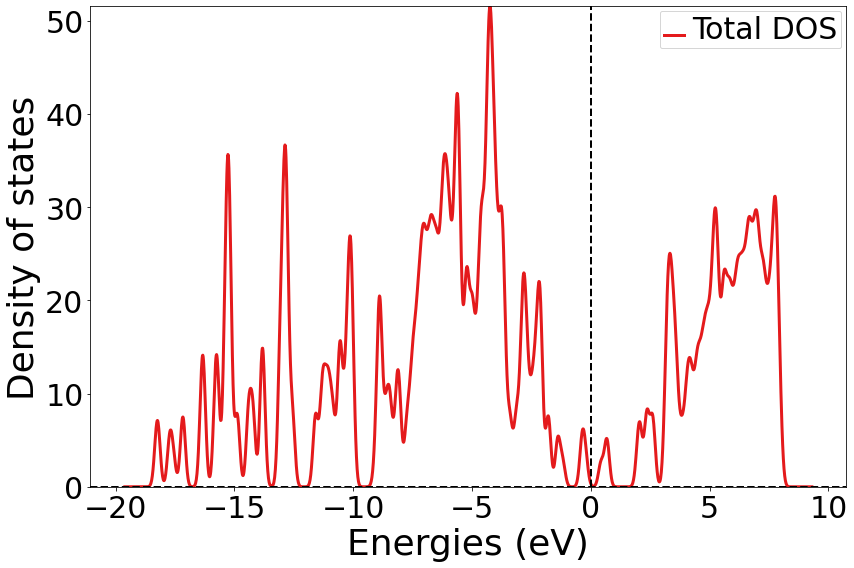

In [46]:
# plotting density of states
from pymatgen.electronic_structure.plotter import DosPlotter

tdos = vasprun.tdos
plotter = DosPlotter(sigma=0.1)
plotter.add_dos("Total DOS", tdos)
plotter.show()

In [48]:
from pymatgen.io.vasp import Outcar

outcar = Outcar("/content/Parsing_Files/vasp/OUTCAR")

In [57]:
outcar.run_stats

{'Average memory used (kb)': 0.0,
 'Elapsed time (sec)': 537.543,
 'Maximum memory used (kb)': 411408.0,
 'System time (sec)': 30.046,
 'Total CPU time used (sec)': 534.446,
 'User time (sec)': 504.399,
 'cores': '16'}

# **Parsing Gaussian files**

Gaussian 16 is the latest in the Gaussian series of programs. It provides state-of-the-art capabilities for electronic structure modeling. Gaussian 16 is licensed for a wide variety of computer systems. All versions of Gaussian 16 contain every scientific/modeling feature, and none imposes any artificial limitations on calculations other than your computing resources and patience. https://gaussian.com/gaussian16/

## **pymatgen**

In [ ]:
from pymatgen.io.gaussian  import GaussianOutput

In [ ]:
# reading the log file
gout = GaussianOutput("/content/Parsing_Files/gaussian/tddft.log")

In [ ]:
# looking at all the methods available
dir(gout)

['Mulliken_charges',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_pcm',
 '_parse',
 'as_dict',
 'basis_set',
 'bond_orders',
 'cart_forces',
 'charge',
 'corrections',
 'dieze_tag',
 'eigenvalues',
 'electrons',
 'energies',
 'errors',
 'filename',
 'final_energy',
 'final_structure',
 'frequencies',
 'functional',
 'get_scan_plot',
 'get_spectre_plot',
 'hessian',
 'is_pcm',
 'is_spin',
 'link0',
 'num_basis_func',
 'opt_structures',
 'pcm',
 'properly_terminated',
 'read_excitation_energies',
 'read_scan',
 'resumes',
 'route_parameters',
 'save_scan_plot',
 'save_spectre_plot',
 'spin_multiplicity',
 'stationary_type',
 'structures',
 'structures_input_or

In [ ]:
# getting the final energy
gout.final_energy

-1507.63190069

In [ ]:
# final structure
gout.final_structure

Molecule Summary
Site: C (-4.0049, -0.0094, -0.0001)
Site: C (-2.8105, -0.0084, -0.0002)
Site: C (-1.3900, -0.0046, -0.0001)
Site: C (-0.7067, 1.2030, -0.0000)
Site: C (-0.6988, -1.2077, -0.0002)
Site: C (-1.3907, 2.4419, 0.0000)
Site: C (0.6988, 1.2077, 0.0000)
Site: C (0.7067, -1.2030, -0.0001)
Site: C (-1.3745, -2.4510, -0.0003)
Site: H (-2.4630, 2.4302, -0.0000)
Site: C (-0.7168, 3.5977, 0.0001)
Site: C (1.3900, 0.0046, -0.0000)
Site: C (1.3745, 2.4510, 0.0001)
Site: C (1.3907, -2.4419, -0.0002)
Site: C (-0.6931, -3.6024, -0.0004)
Site: H (-2.4468, -2.4460, -0.0003)
Site: C (0.6931, 3.6024, 0.0002)
Site: C (2.8105, 0.0084, 0.0000)
Site: H (2.4468, 2.4460, 0.0002)
Site: H (2.4630, -2.4302, -0.0002)
Site: C (0.7168, -3.5977, -0.0003)
Site: H (-1.2195, -4.5376, -0.0004)
Site: H (1.2195, 4.5376, 0.0003)
Site: C (4.0049, 0.0094, 0.0001)
Site: H (-1.2495, 4.5294, 0.0002)
Site: H (1.2495, -4.5294, -0.0004)
Site: Si (-5.8429, -0.0031, 0.0001)
Site: C (-6.4243, -0.8770, -1.5241)
Site: C (-6

In [ ]:
# TDDFT excitations
gout.read_excitation_energies()

[(3.4772, 356.57, 0.7094),
 (4.5538, 272.27, 0.0399),
 (5.5164, 224.75, 0.0001),
 (5.5533, 223.26, 0.0),
 (5.5682, 222.66, 0.1633),
 (5.6441, 219.67, 0.0),
 (5.7264, 216.51, 2.1826),
 (6.0133, 206.18, 0.0),
 (6.0691, 204.29, 0.0),
 (6.0823, 203.84, 0.0016),
 (6.6186, 187.33, 0.1568),
 (6.822, 181.74, 0.3013),
 (6.8475, 181.07, 0.0),
 (6.8841, 180.1, 0.0),
 (7.2298, 171.49, 0.0021)]

## **Generic text parsing**

We will use regular expressions for parsing text files.

The process for parsing is as follows - 
1.   Find a unique pattern for the start of parsing segment
2.   Find a pattern for the end of segment
1.   Read the file
2.   Look for the line with start pattern
1.   Starting the parsing code until end pattern is encountered













In [ ]:
import re

In [ ]:
# We will parse the Mulliken charges for all atoms

# Find the pattern
start_pattern = re.compile(r'')

In [ ]:
# The pattern at the end
end_pattern = re.compile(r'')

In [ ]:
# read the file
with open() as f:
  lines = f.read()

In [ ]:
# line with start pattern

In [ ]:
# parse lines

In [ ]:
# parsed data

### **Exercise**

Parse the Mulliken charges with hydrogens summed into heavy atoms

In [ ]:
# YOUR CODE HERE